<a href="https://colab.research.google.com/github/AlexFaida/projects_Python/blob/main/Kiva%2C_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов.

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).



## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

<ipython-input-1-db0e3586f8da>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [ ]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

In [ ]:
df_kiva_loans.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01


In [ ]:
df_kiva_loans['loan_amount'].max()

100000.0

In [ ]:
df_mpi.head(1)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995


_________

# Самостоятельная работа 4.05

### Задание 1. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

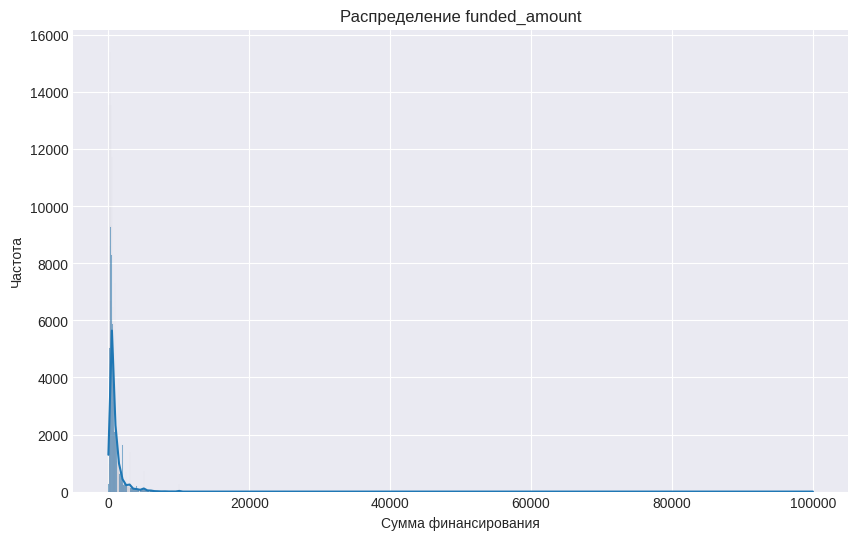

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_kiva_loans['funded_amount'], kde=True)
plt.title('Распределение funded_amount')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
plt.show()

### Задание 2. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены?

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [ ]:
df_large_loans = df_kiva_loans[df_kiva_loans.loan_amount > 20000]
df_large_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,212.0,2014-03-21 05:25:02+00:00,2014-05-21 07:00:00+00:00,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21
38725,691328,25000.0,25000.0,Construction Supplies,Construction,To supply construction materials for a vocatio...,RW,Rwanda,Kigali,USD,319.0,2014-03-31 09:43:06+00:00,2014-03-26 07:00:00+00:00,2014-04-16 22:14:29+00:00,7.0,821,"user_favorite, #Repeat Borrower, #Unique, #Job...",male,irregular,2014-03-31
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,212.0,2014-04-09 08:25:02+00:00,2014-06-09 07:00:00+00:00,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09
53634,706146,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,UG,Uganda,Kampala,USD,212.0,2014-05-06 09:25:03+00:00,2014-07-06 07:00:00+00:00,2014-05-18 15:31:08+00:00,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10


In [ ]:
countries_of_large_loans = df_large_loans['country'].tolist()
country_counts = {}
for country in countries_of_large_loans:
    if country in country_counts:
        country_counts[country] += 1
    else:
        country_counts[country] = 1
for country, count in country_counts.items():
    print(f"{country}: {count}")

Peru: 2
Rwanda: 2
Kenya: 4
Uganda: 2
Haiti: 2
Mexico: 7
Lao People's Democratic Republic: 2
Mali: 1
Chile: 2
Cambodia: 1


Страны где офромлены внушительные кредиты: Перу, Руанда, Кения, Уганда, Гаити, Мексика, Лаос, Мали, Чили, Камбоджа

### Задание 3. Попробуйте найти связь между странами (макрорегионами), полом заемщика и суммой заявки. Сделайте выводы из этих данных?

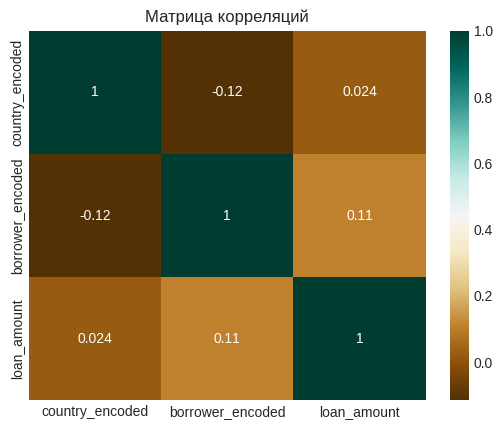

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_temp = pd.DataFrame()
df_temp['country_encoded'] = label_encoder.fit_transform(df_kiva_loans['country'])
df_temp['gender_encoded'] = label_encoder.fit_transform(df_kiva_loans['borrower_genders'])
df_temp['loan_amount'] = df_kiva_loans['loan_amount']
cor_matrix = df_temp.corr()
sns.heatmap(cor_matrix, cmap='BrBG', annot=True)
plt.title('Матрица корреляций')
plt.show()

In [ ]:
female_count = df_kiva_loans[df_kiva_loans['borrower_genders'] == 'female'].shape[0]
male_count = df_kiva_loans[df_kiva_loans['borrower_genders'] == 'male'].shape[0]
print(female_count, male_count)

426502 134710


Женщины берут кредит чаще, но корреляция между размером кредита и полом низкая 0.11

### Задание 4. Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей?

Страны, где офромлены внушительные кредиты: Перу, Руанда, Кения, Уганда, Гаити, Мексика, Лаос, Мали, Чили, Камбоджа. Женщины берут кредит чаще, но корреляция между размером кредита и полом низкая - 0.11.
В этих странах могут брать кредиты на следующие цели:

1. **Малый бизнес и сельское хозяйство**: Начало или развитие собственного бизнеса.

2. **Образование**: Оплата обучения для себя или детей.

3. **Здравоохранение**: Оплата медицинских расходов.

4. **Жилье**: Строительство или улучшение жилищных условий.

5. **Микрокредиты**: Развитие мелкого предпринимательства.

6. **Социальные нужды**: Покрытие семейных расходов.


____________

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [ ]:
df_mean_mpi = df_mpi.groupby('country')['MPI'].mean()
df_mean_mpi = df_mean_mpi.sort_values(ascending=False)
df_mean_mpi.head(5)

country
Chad            0.582905
South Sudan     0.549778
Burkina Faso    0.547692
Niger           0.543375
Ethiopia        0.492273
Name: MPI, dtype: float64

### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

In [ ]:
countries = df_mean_mpi.index.tolist()
for country in countries:
  df_mean_mpi.index == country

print(len(set(countries)))

102


30


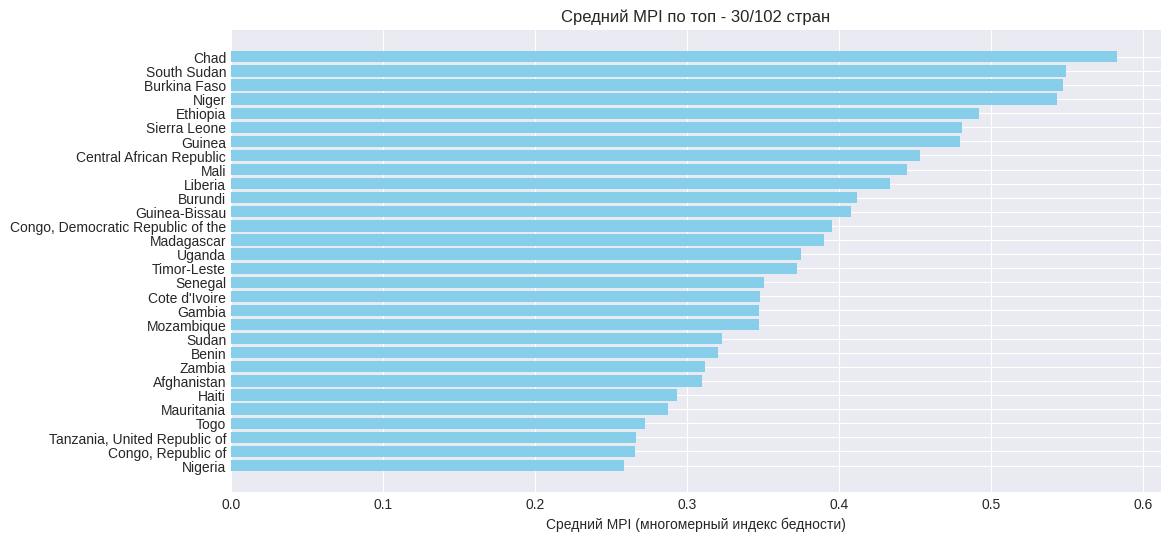

In [ ]:
import matplotlib.pyplot as plt

top = int(input())
df_mean_mpi = df_mpi.groupby('country')['MPI'].mean()
df_mean_mpi = df_mean_mpi.sort_values(ascending=False)
df_mean_mpi = df_mean_mpi.head(top)

plt.figure(figsize=(12, 6))
plt.barh(df_mean_mpi.index, df_mean_mpi.values, color='skyblue')
plt.xlabel('Средний MPI (многомерный индекс бедности)')
plt.title(f'Средний MPI по топ - {top}/102 стран')
plt.gca().invert_yaxis()
plt.show()
